# Task
Complete the "Heart Disease Prediction" task by following the provided instructions and plan. The task involves loading the "Heart Disease UCI Dataset", cleaning the data, performing EDA, training a classification model (Logistic Regression or Decision Tree), evaluating the model using accuracy, ROC curve, and confusion matrix, and highlighting important features.

## Load the dataset

### Subtask:
Load the Heart Disease UCI Dataset into a pandas DataFrame.


In [ ]:
import pandas as pd

# Try loading the dataset from a common online source first
try:
    # This URL is another common source for the Heart Disease dataset
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                     names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
                     na_values='?') # The dataset uses '?' for missing values
    # Convert the target to binary (0: no disease, 1: disease)
    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

    display(df.head())

except Exception as e:
    print(f"An error occurred: {e}")
    # If loading from the URL fails, try a local path if it exists and is in a different encoding
    try:
        df = pd.read_csv('heart.csv', encoding='latin1') # Try 'latin1' encoding
        display(df.head())
    except FileNotFoundError:
        print("heart.csv not found locally.")
    except Exception as e_local:
        print(f"An error occurred while loading local file: {e_local}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
import pandas as pd

# Try a different URL and encoding for the Heart Disease UCI dataset
try:
    # This URL is another common source for the Heart Disease dataset
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                     names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
                     na_values='?') # The dataset uses '?' for missing values
    # Convert the target to binary (0: no disease, 1: disease)
    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

    display(df.head())

except Exception as e:
    print(f"An error occurred: {e}")
    # If loading from the URL fails, try a local path if it exists and is in a different encoding
    try:
        df = pd.read_csv('heart.csv', encoding='latin1') # Try 'latin1' encoding
        display(df.head())
    except FileNotFoundError:
        print("heart.csv not found locally.")
    except Exception as e_local:
        print(f"An error occurred while loading local file: {e_local}")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Clean the data

### Subtask:
Handle missing values if any and perform necessary data type conversions.


In [ ]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Review data types
print("\nData types before handling:")
df.info()

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Data types before handling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
d

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Review data types after dropping missing values
print("\nData types after handling missing values:")
df.info()

# Display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
display(df.head())


Data types after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB

First few rows of the cleaned DataFrame:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Perform eda

### Subtask:
Analyze the data to understand trends, correlations, and distributions of features.


Descriptive Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000



Correlation Matrix:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


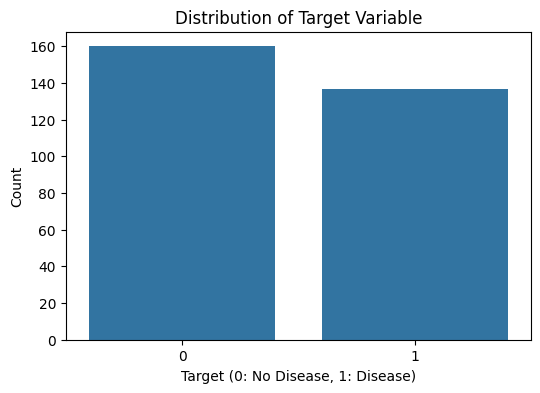

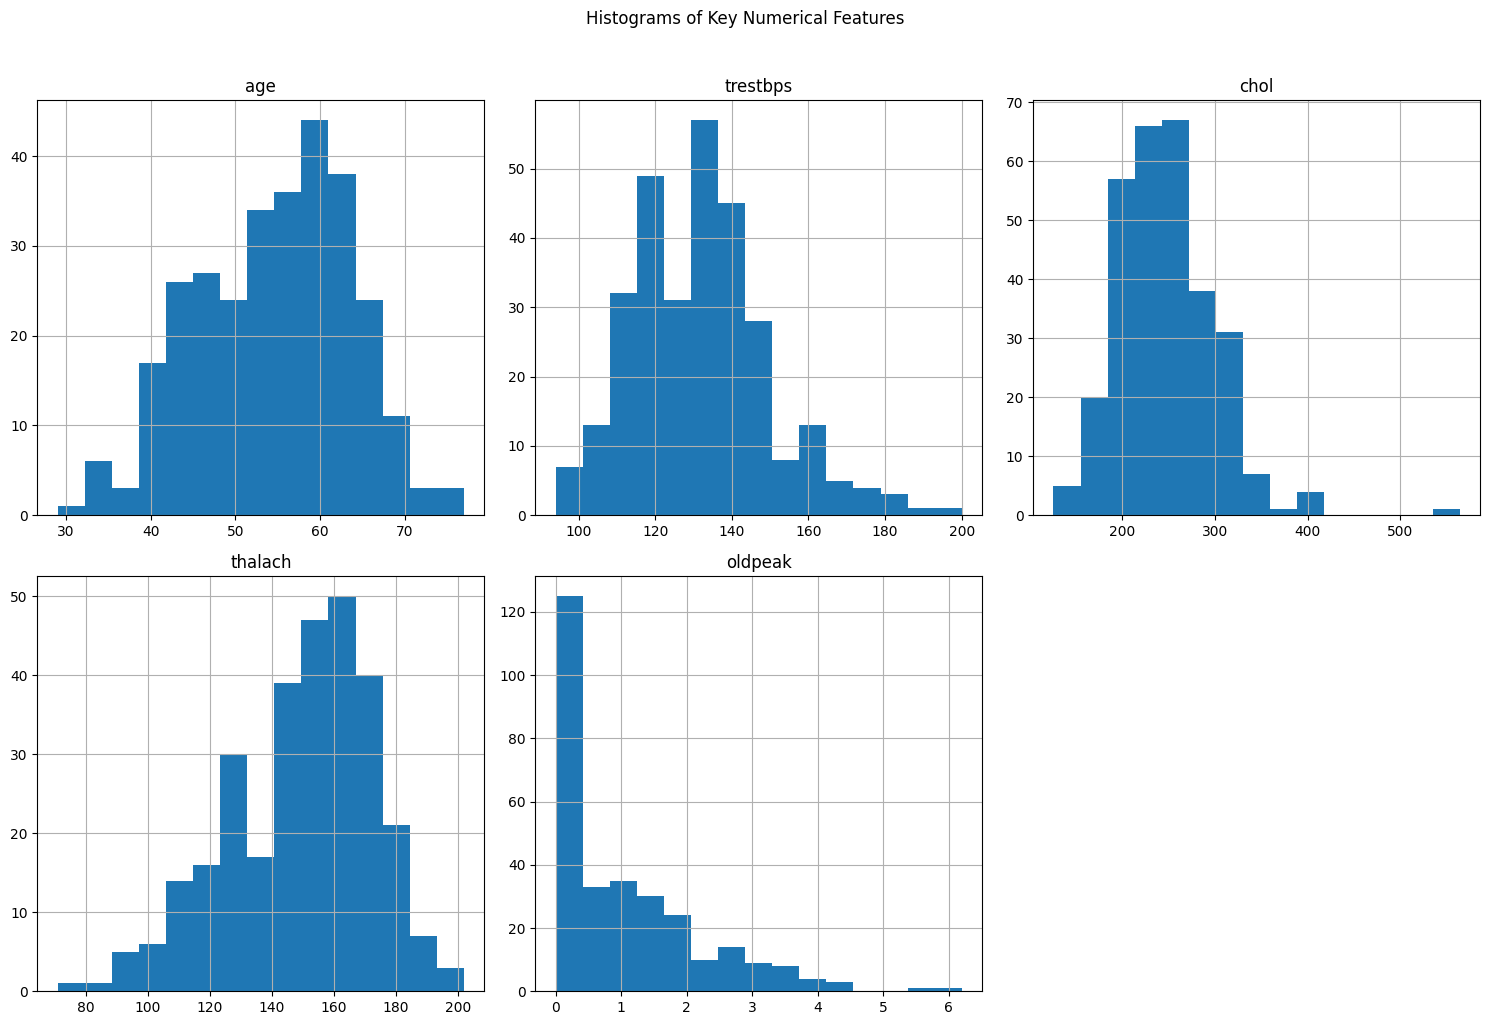

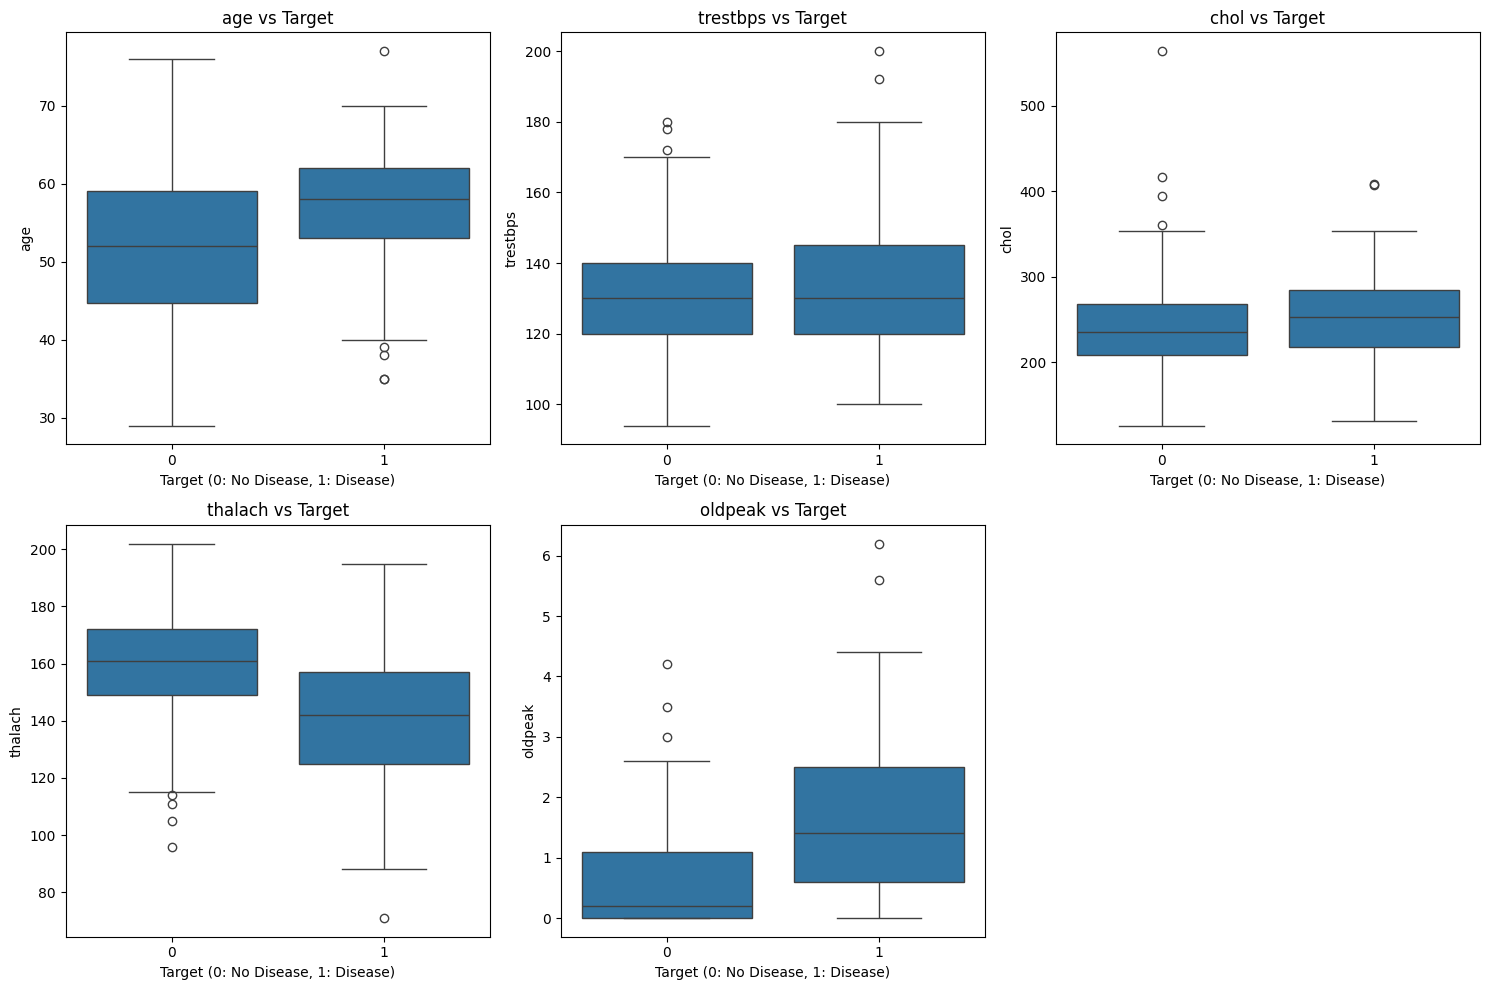

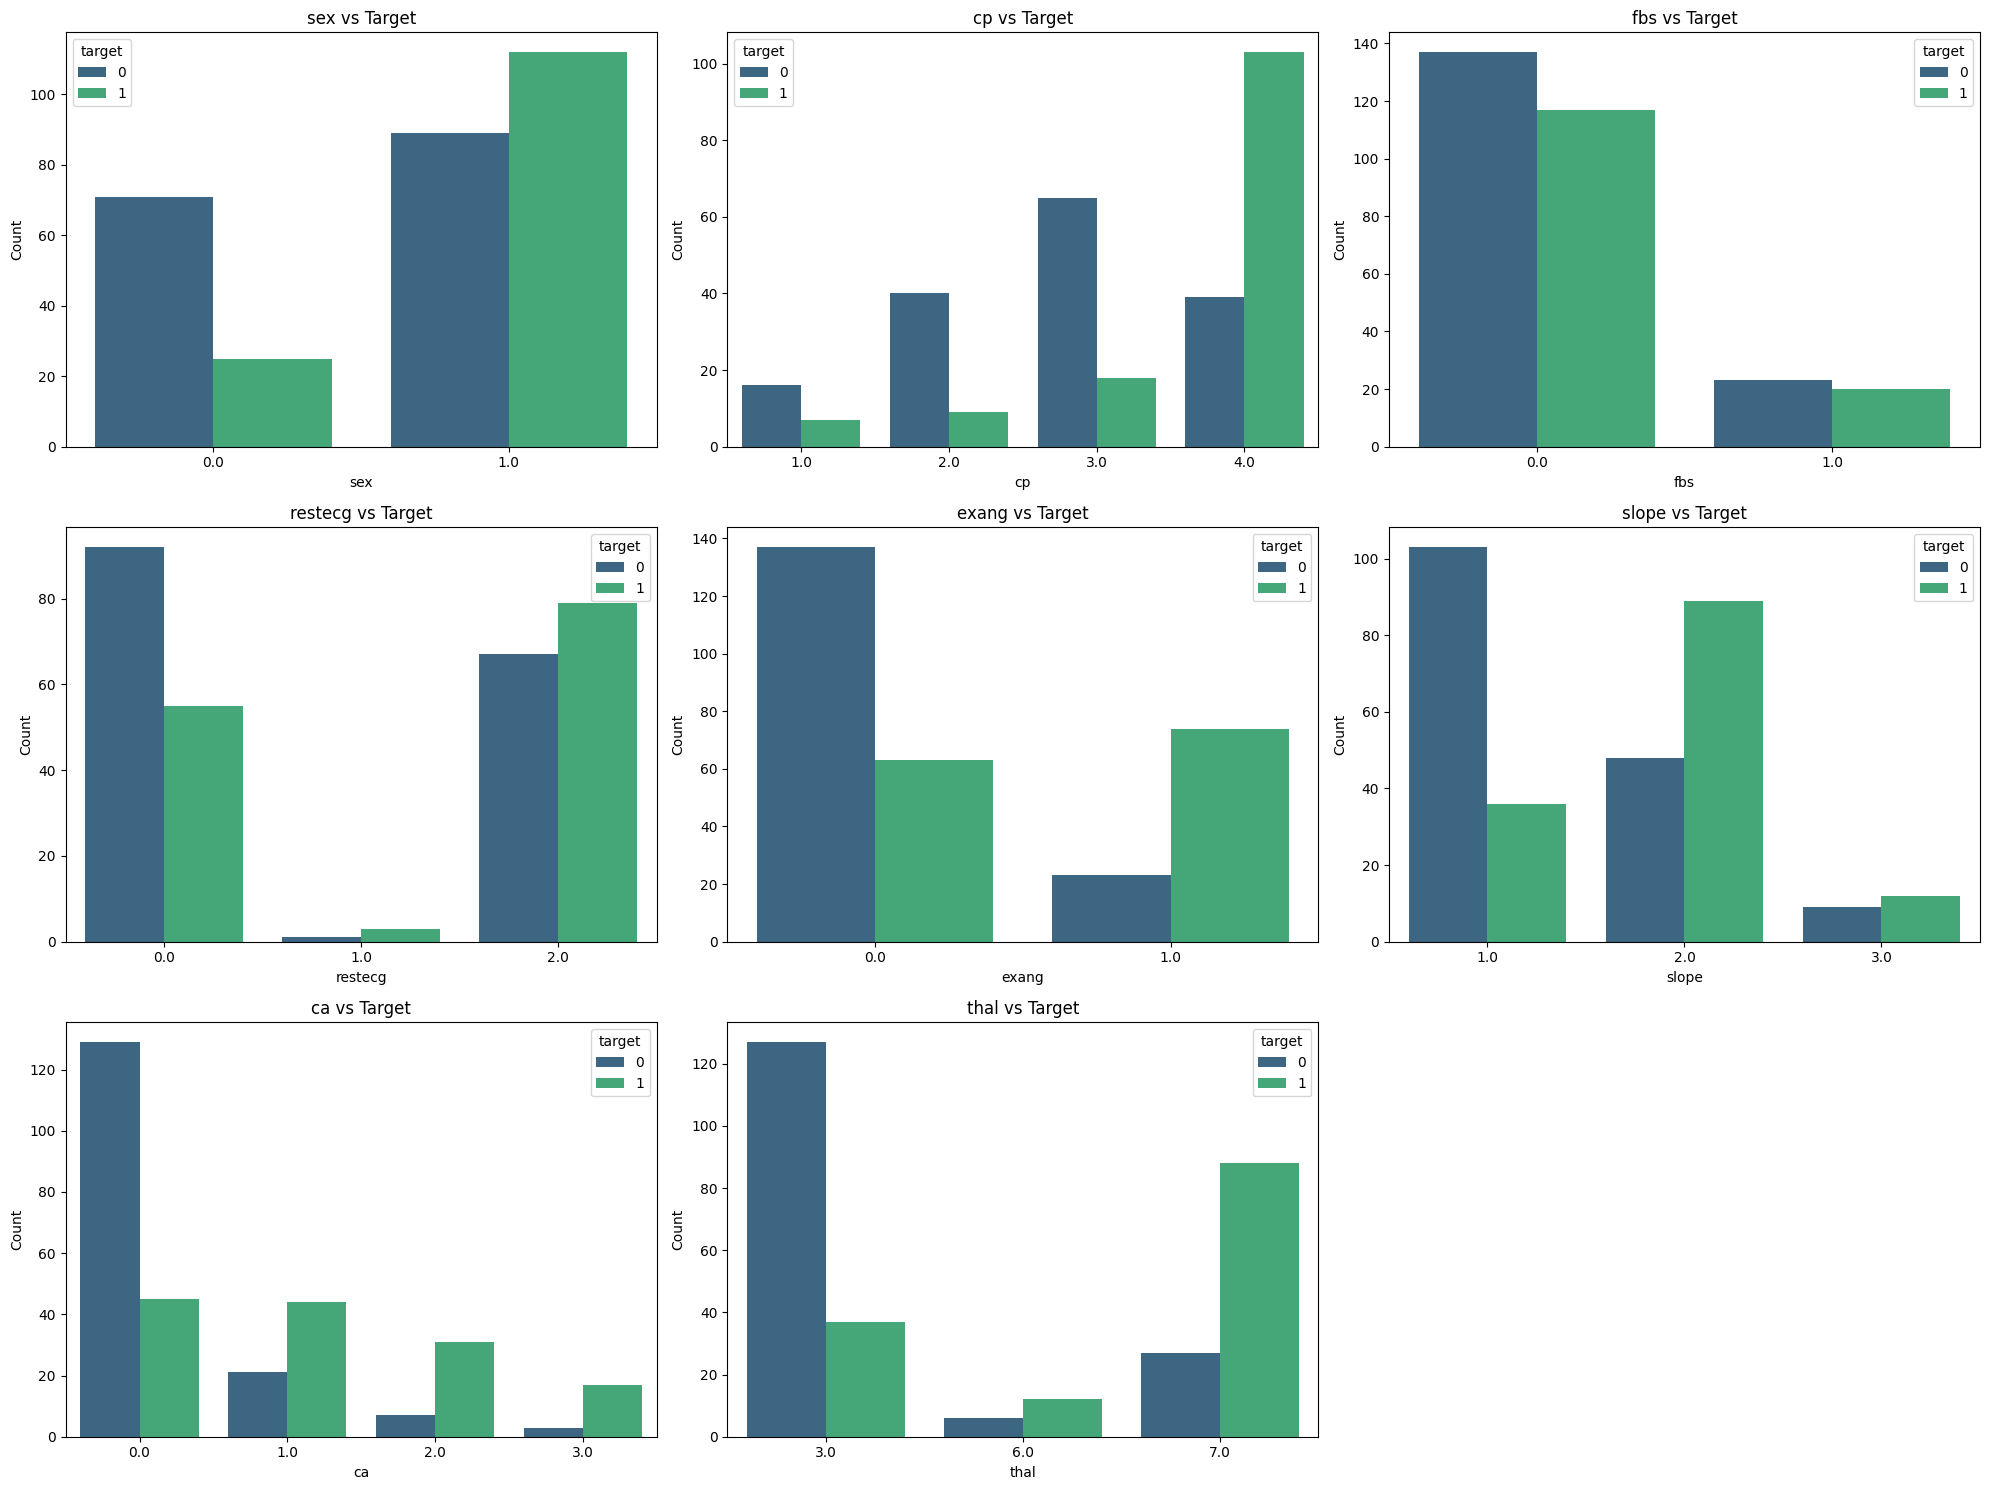

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate and display descriptive statistics for the numerical columns
print("Descriptive Statistics:")
display(df.describe())

# 2. Calculate and display the correlation matrix for the numerical columns
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
display(correlation_matrix)

# 3. Visualize the distribution of the 'target' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.show()

# 4. Create histograms for key numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Key Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# 5. Create box plots to visualize the relationship between the 'target' variable and some key numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
    plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.tight_layout()
plt.show()

# 6. Create countplots for categorical features and their relationship with the 'target' variable
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, hue='target', data=df, palette='viridis')
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Prepare the data for modeling by scaling numerical features and encoding categorical features.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical and categorical features based on EDA
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Scale numerical features
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features, index=df.index)

# One-hot encode categorical features
df_categorical_dummies = pd.get_dummies(df[categorical_features], drop_first=True, dtype=float)

# Concatenate scaled numerical and dummy-coded categorical features
df_processed = pd.concat([df_numerical_scaled, df_categorical_dummies, df['target']], axis=1)

display(df_processed.head())

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.936181,0.750380,-0.276443,0.017494,1.068965,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0,1
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,0


## Split the data

### Subtask:
Split the dataset into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_processed.drop('target', axis=1)
y = df_processed['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (237, 13)
Shape of X_test: (60, 13)
Shape of y_train: (237,)
Shape of y_test: (60,)


## Train a classification model

### Subtask:
Train a Logistic Regression or Decision Tree model on the training data.


**Reasoning**:
Import the LogisticRegression class, instantiate a LogisticRegression model, and fit the model to the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate the model

### Subtask:
Evaluate the model using accuracy, ROC curve, and confusion matrix on the testing data.


Accuracy Score: 0.9000

Confusion Matrix:
[[33  3]
 [ 3 21]]

AUC: 0.9468


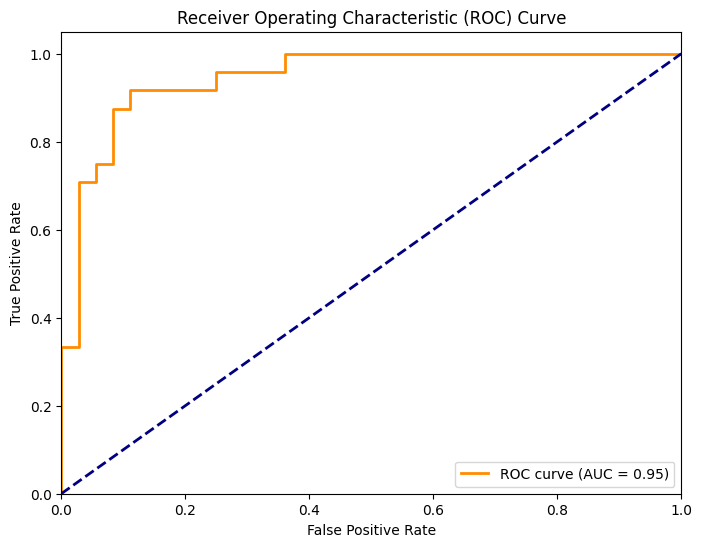

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate the predicted probabilities of the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Feature importance analyzer

### Subtask:
Analyze feature importance


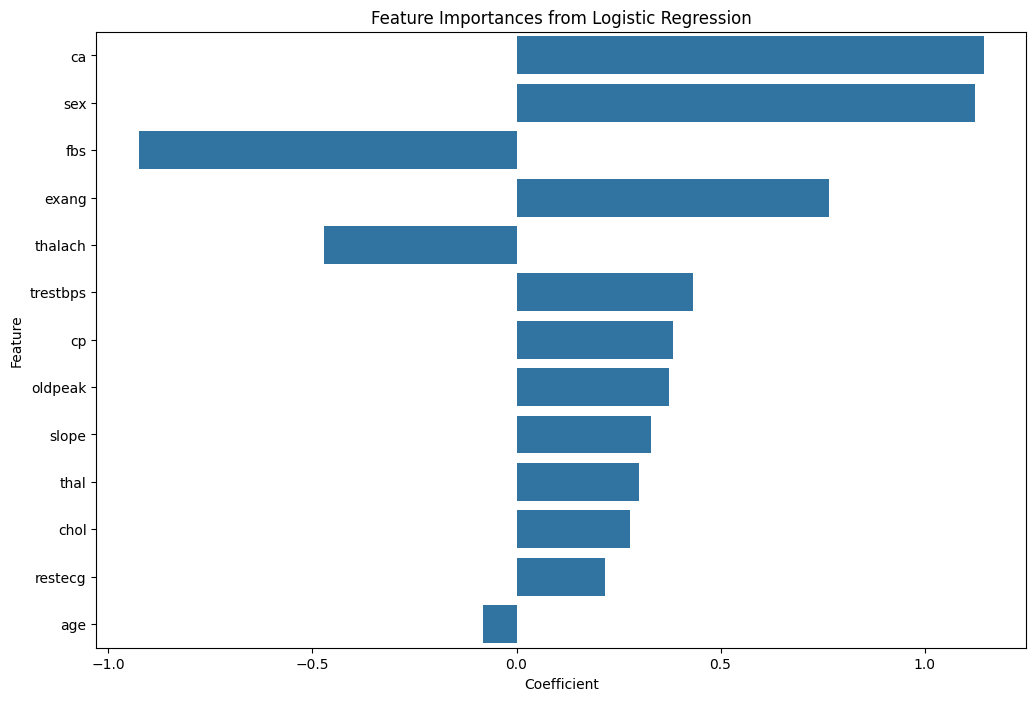

In [ ]:
# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients in descending order
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values('abs_coefficient', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=feature_importance_sorted)
plt.title('Feature Importances from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()